# 1. Importing Libraries & loading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
def load_data():
    train_df = pd.read_csv('Dataset/train.csv')
    test_df = pd.read_csv('Dataset/test.csv')
    val_df = pd.read_csv('Dataset/val.csv')
    train_val_df = pd.read_csv('Dataset/trainval.csv')
    return train_df, test_df, val_df, train_val_df

In [4]:
if __name__ == '__main__':
    train_df, test_df, val_df, train_val_df = load_data()

# 2. Data Cleaning

In [5]:
train_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
train_df.duplicated().sum()

np.int64(448)

In [7]:
train_df = train_df.drop_duplicates()

In [8]:
target_train_df = train_df['Class']
target_val_df = val_df['Class']
target_test_df = test_df['Class']


train_df = train_df.drop(columns=['Class'],axis=1)
val_df = val_df.drop(columns=['Class'],axis=1)
test_df = test_df.drop(columns=['Class'],axis=1)

In [9]:
train = train_df.to_numpy()
val = val_df.to_numpy()
test = test_df.to_numpy()
target_train = target_train_df.to_numpy()
target_val = target_val_df.to_numpy()
target_test = target_test_df.to_numpy()

# 3. Data Exploring

### 3.1 Quick overviwe & basic Statistics 

In [10]:
train_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,...,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000
mean,94964.883252,0.003016,-0.003764,-0.001770,-0.004885,0.001359,-0.000109,0.000715,-0.002095,-0.001676,...,-0.000960,0.000341,-0.000016,0.000579,-0.000780,-0.000788,-0.000671,0.001634,0.000775,88.596637
std,47458.729255,1.951034,1.646755,1.516106,1.415351,1.391759,1.337909,1.251332,1.191566,1.096377,...,0.777817,0.730435,0.725241,0.620362,0.605168,0.521052,0.481640,0.398607,0.313420,256.942683
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000
25%,54355.000000,-0.919288,-0.600188,-0.896354,-0.850234,-0.690660,-0.769441,-0.553610,-0.209678,-0.642834,...,-0.211575,-0.228009,-0.543061,-0.160869,-0.354463,-0.318465,-0.327476,-0.070596,-0.052949,5.640000
50%,84923.500000,0.018437,0.064566,0.177007,-0.022444,-0.053562,-0.274847,0.040934,0.021147,-0.052595,...,-0.062629,-0.029584,0.006095,-0.010625,0.040433,0.016671,-0.051336,0.001601,0.011229,22.080000
75%,139388.000000,1.316771,0.799875,1.028136,0.735256,0.612154,0.399075,0.569308,0.325010,0.594459,...,0.133227,0.186473,0.528623,0.147974,0.437967,0.350126,0.240168,0.091825,0.078454,77.822500
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,...,39.420904,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000


In [11]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.269148,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.033806,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.509795,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,-0.096924,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,0.011447,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31


In [12]:
train_df['Time'].head()

0    119191.0
1     71750.0
2    151977.0
3     55709.0
4     66654.0
Name: Time, dtype: float64

In [13]:
train_df['Amount'].head()

0      8.73
1     59.95
2    460.65
3      4.78
4     44.31
Name: Amount, dtype: float64

##### Comment:
We begin by loading the dataset to understand its structure and quality.
* **Dataset Dimensions:** The dataset contains 170436. transactions with 31 features.
* **Data Types:** All features are numerical (`float64` for PCA components and `int64` for the Class), which simplifies preprocessing as no categorical 
* **Missing Values:** A check for null values confirms that the dataset is clean, with **0 null values** across all columns.

### 3.2 Correlation

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

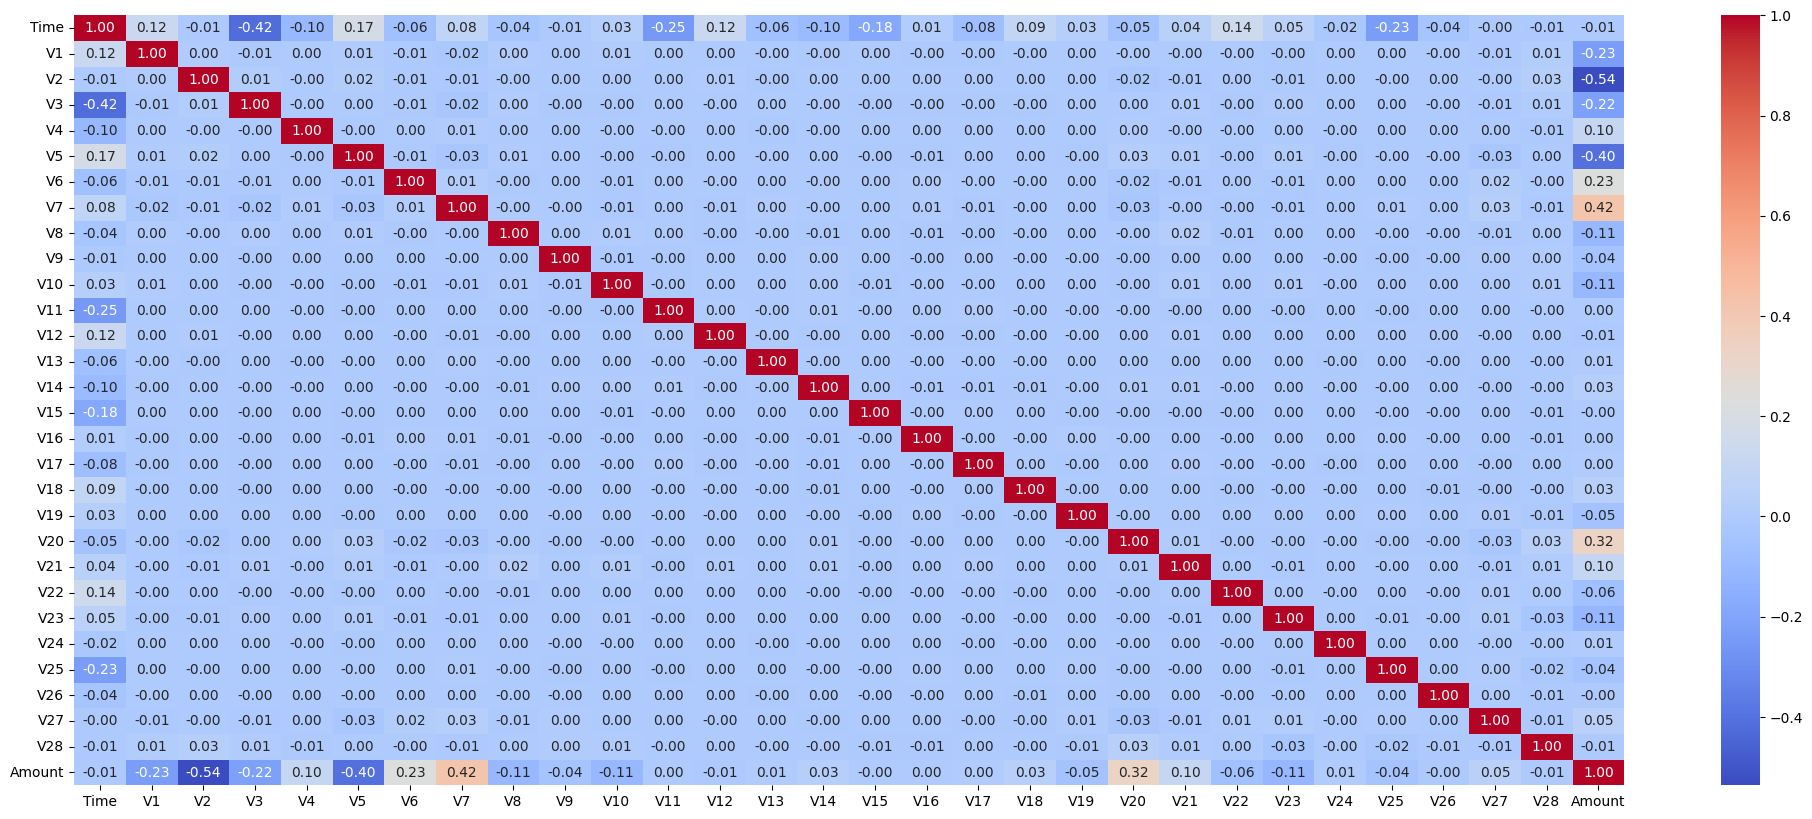

In [15]:
train_corr = train_df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(
    train_corr,
    annot=True,
    cmap = 'coolwarm',
    fmt ='.2f'
)
plt.show()

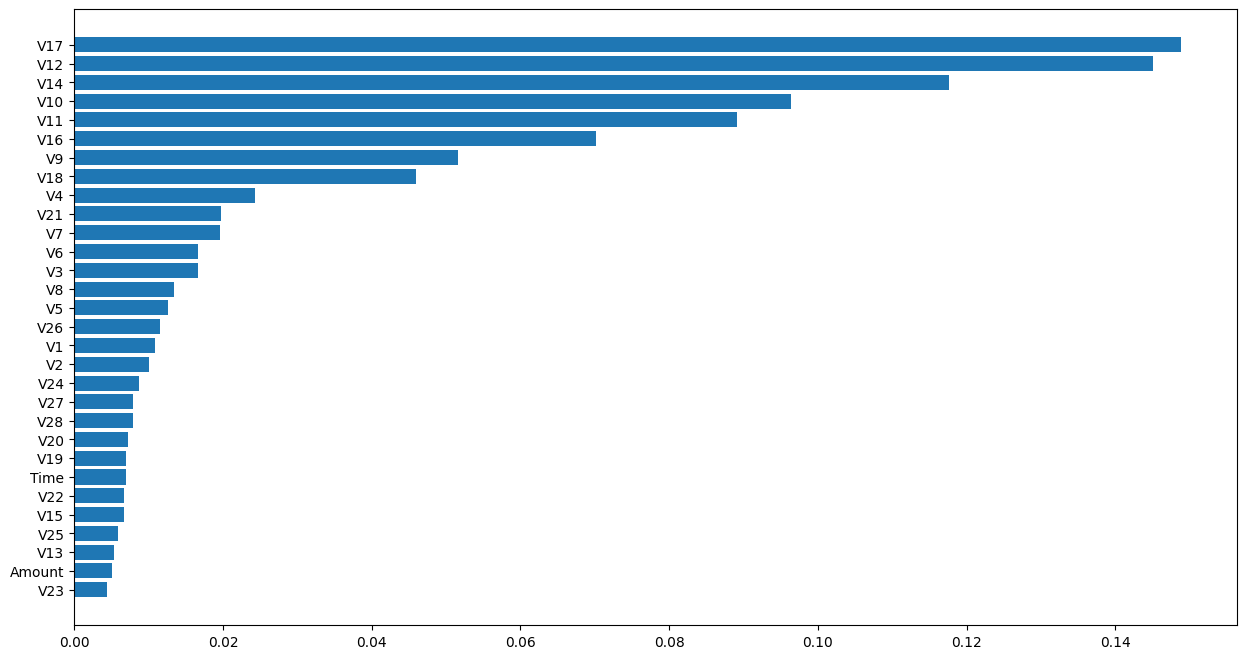

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_imp = RandomForestClassifier(
    n_estimators=100,
    max_depth=9,
    n_jobs=-1,
    max_features='log2',
    random_state=17
)
rf_imp.fit(train_df,target_train_df)
imp = rf_imp.feature_importances_
feature_imp = pd.DataFrame({'Feature' : train_df.columns, 'Importance' : imp})
feature_imp = feature_imp.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(15,8))
plt.barh(feature_imp['Feature'], feature_imp['Importance'])
plt.gca()
plt.show()

# 4. Feature Distribution


### 4.1 Amount Feature

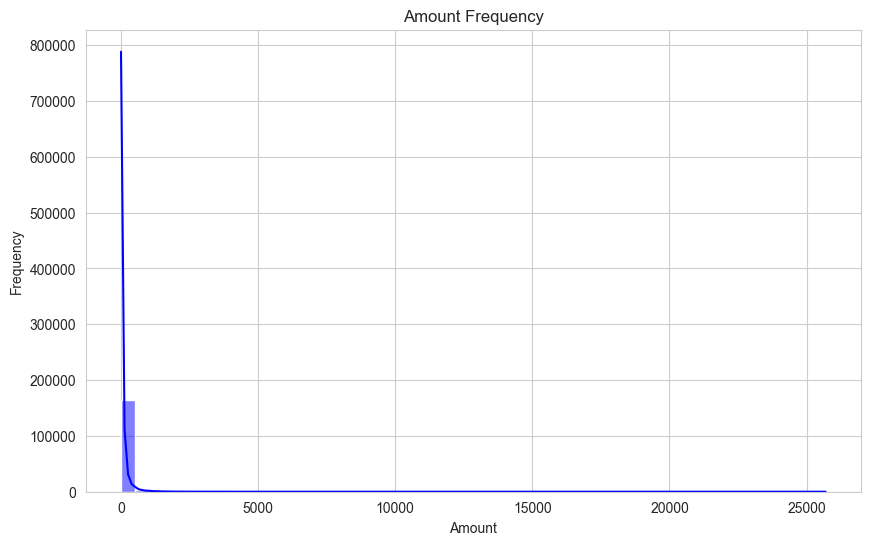

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(train_df['Amount'],bins=50, kde=True, color='blue')
plt.title('Amount Frequency')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

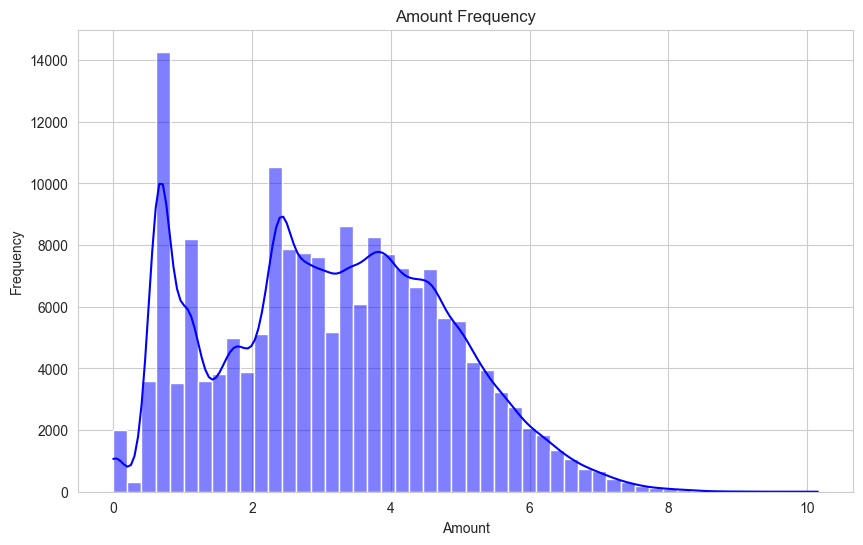

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(train_df['log_amount'],bins=50, kde=True, color='blue')
plt.title('Amount Frequency')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

### 4.2 Time Feature

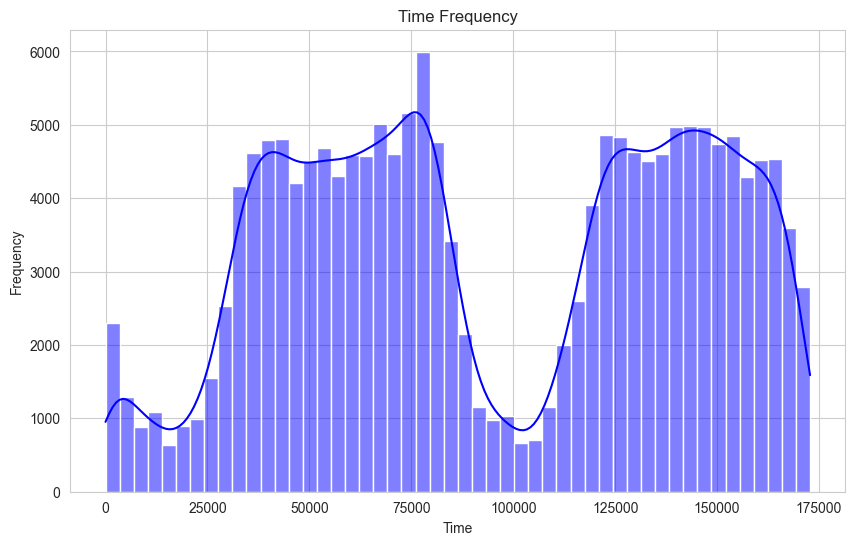

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(train_df['Time'],bins=50, kde=True, color='blue')
plt.title('Time Frequency')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

## Comment: 
Since features V1-V28 are already PCA-transformed, we focus on the only two non-transformed features: `Time` and `Amount`.
##### Time Feature
* **Observation:** The distribution is bimodal (has two peaks), reflecting the day/night cycle of transaction volumes.
* **Decision:** informative to some extent
##### Amount Feature
* **Observation:** The `Amount` distribution is heavily **right-skewed**. Most transactions are small (close to 0), but there is a long tail of high-value transactions.
* **Action Required:** This skewness and the presence of outliers necessitate **Scaling**. We will use `RobustScaler` or `StandardScaler` to reduce the impact of these extreme outliers.

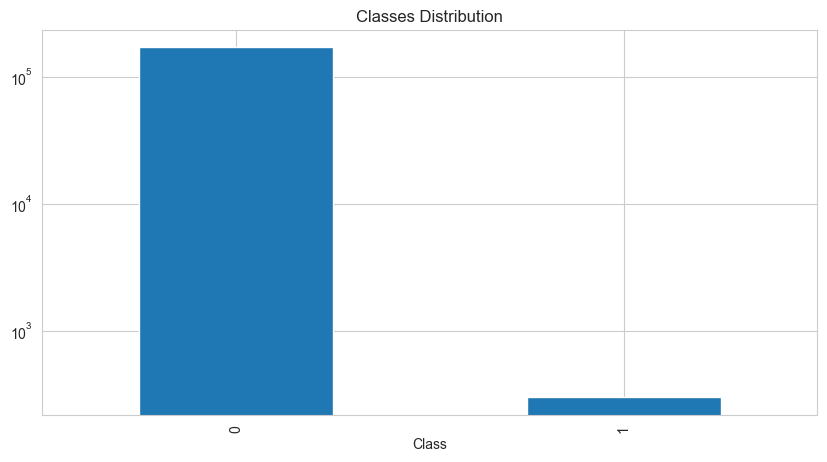

In [19]:
stat = target_train_df.value_counts()
stat
plt.figure(figsize=(10,5))
stat.plot(kind='bar', logy=True,title='Classes Distribution')
plt.show()

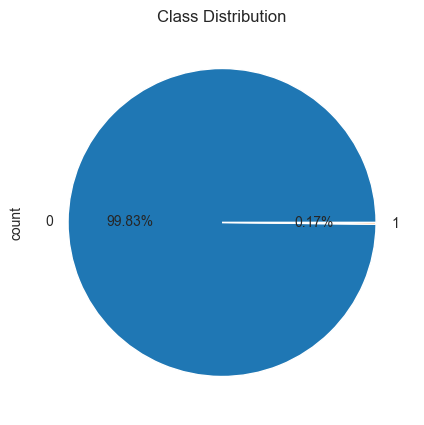

In [20]:
plt.figure(figsize=(10,5))
stat.plot(kind='pie', autopct ='%.2f%%',title='Class Distribution')
plt.show()

## Comment:
We examine the distribution of the target variable `Class` to determine the severity of the imbalance.
* **Class 0 (Normal):** Represents 99.83% of the data.
* **Class 1 (Fraud):** Represents only 0.17%.
* **Conclusion:** This extreme imbalance indicates that standard accuracy metrics will be misleading. We must use resampling techniques (like SMOTE) and focus on Precision/Recall metrics later.

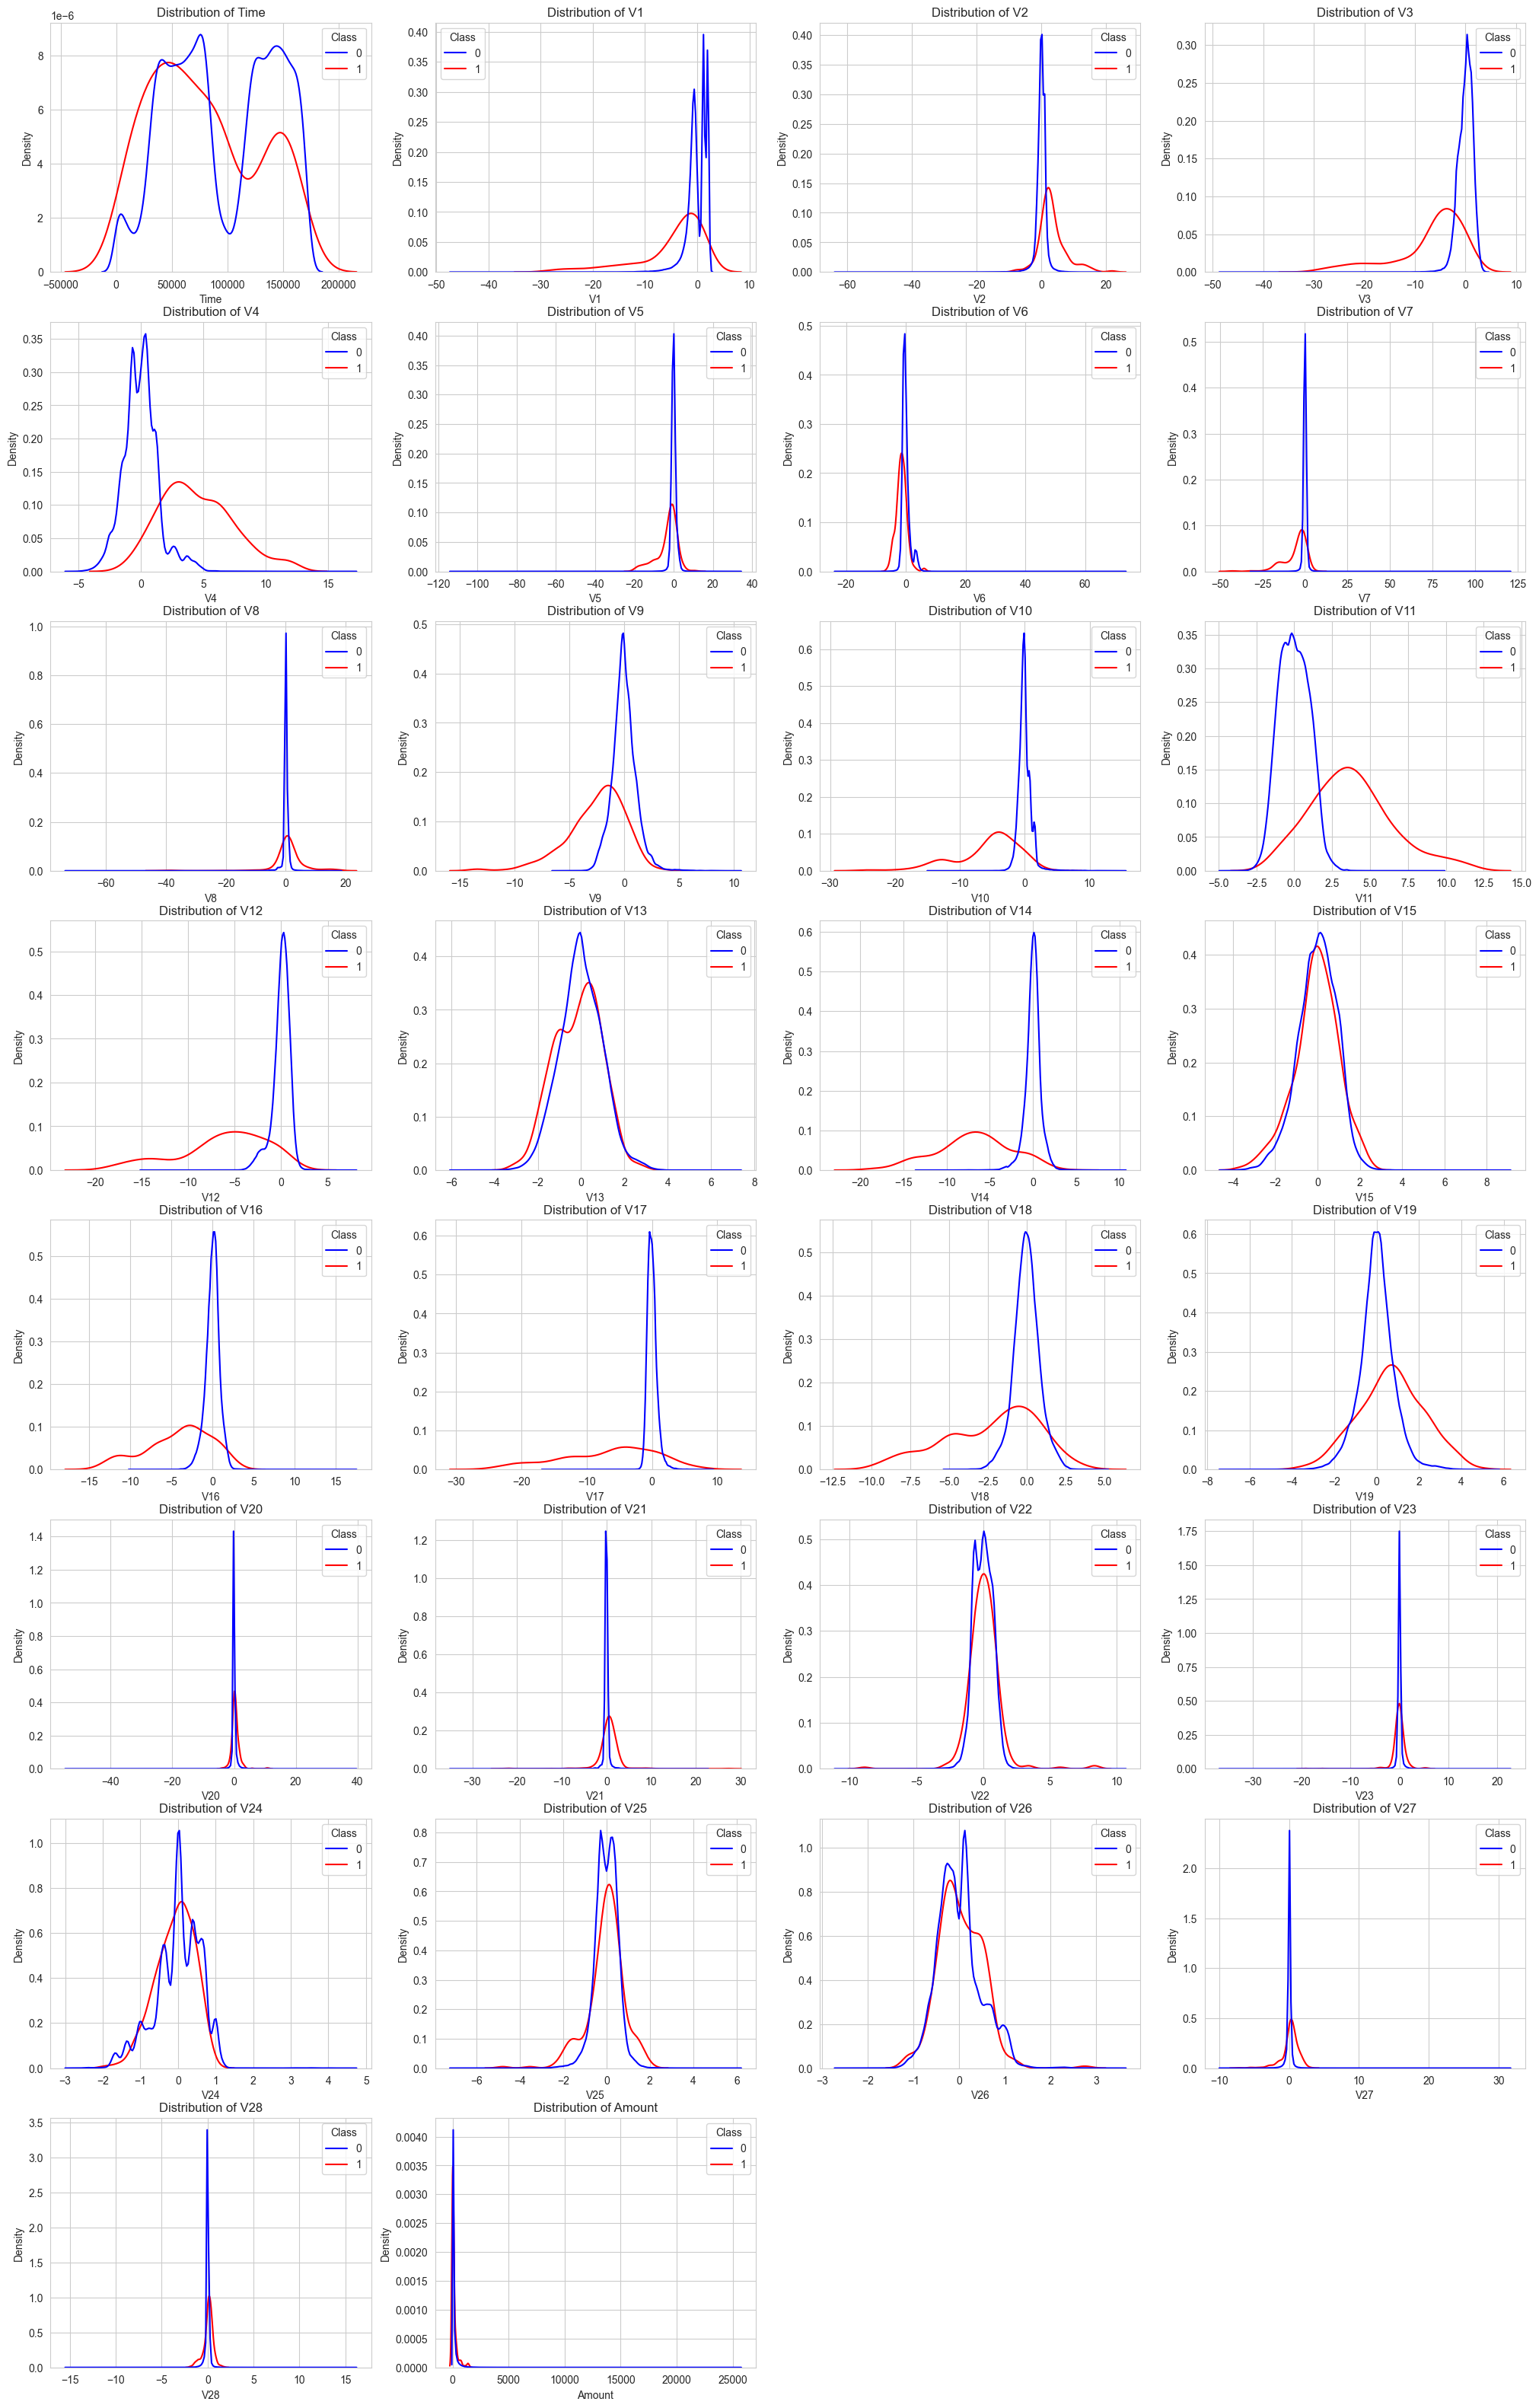

In [21]:
import math
train_df['Class'] = target_train_df
features = [col for col in train_df.columns if col != 'Class']
n_cols = 4
n_rows = math.ceil(len(features)/ n_cols)
plt.figure(figsize=(25,40))
for i, col in enumerate(features):
    plt.subplot(n_rows,n_cols,i+1)
    sns.kdeplot(data=train_df,x=col, hue='Class', palette={0:'blue',1:'red'},common_norm=False)
    # plt.ylim(.9)
    plt.title(f'Distribution of {col}')
plt.show()

- there are some features that may confuse the model so, we will try to remove them and find the result then.

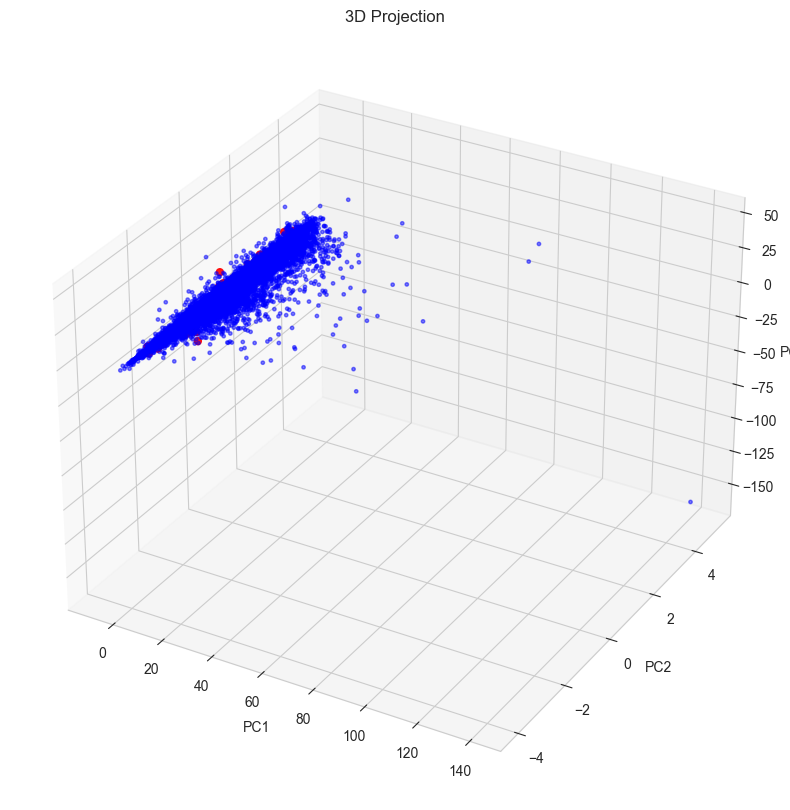

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


train_df= train_df.drop(columns=['Class'],axis=1)
scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df)
pca = PCA(n_components=3)
train_df_pca = pca.fit_transform(train_df_scaled)

pca_df = pd.DataFrame(data = train_df_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Class'] = target_train_df.values

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')



ax.scatter(
    pca_df[pca_df['Class'] == 0]['PC1'],
    pca_df[pca_df['Class'] == 0]['PC2'],
    pca_df[pca_df['Class'] == 0]['PC3'],
    c='blue', label='normal',s=6, alpha=.5
)
ax.scatter(
    pca_df[pca_df['Class'] == 1]['PC1'],
    pca_df[pca_df['Class'] == 1]['PC2'],
    pca_df[pca_df['Class'] == 1]['PC3'],
    c='red', label='fraud',s=25, alpha=.9
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Projection')
plt.show()

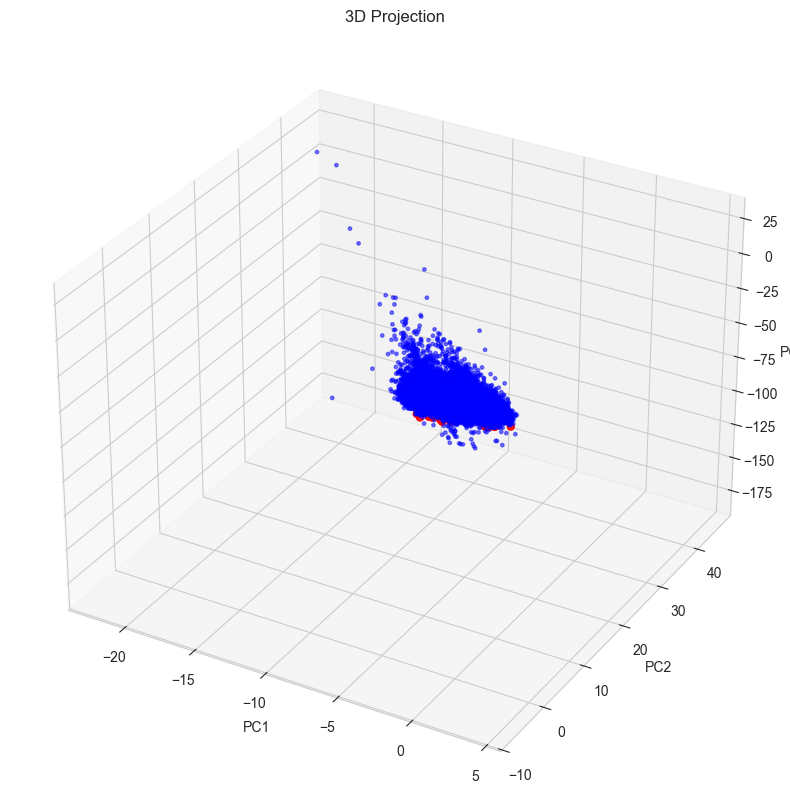

In [23]:
train_df['log_amount'] = np.log1p(train_df['Amount'])
train_df = train_df.drop(columns=['Amount'],axis=1)

scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df)
pca = PCA(n_components=3)
train_df_pca = pca.fit_transform(train_df_scaled)

pca_df = pd.DataFrame(data = train_df_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Class'] = target_train_df.values

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')



ax.scatter(
    pca_df[pca_df['Class'] == 0]['PC1'],
    pca_df[pca_df['Class'] == 0]['PC2'],
    pca_df[pca_df['Class'] == 0]['PC3'],
    c='blue', label='normal',s=6, alpha=.5
)
ax.scatter(
    pca_df[pca_df['Class'] == 1]['PC1'],
    pca_df[pca_df['Class'] == 1]['PC2'],
    pca_df[pca_df['Class'] == 1]['PC3'],
    c='red', label='fraud',s=25, alpha=.9
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Projection')
plt.show()

## Comment:
* **The first Projection:** the data points form a dense indistinguishable cluster with significant outliers. This indicates the high variance of the `Amount` feature is dominating the other PCA components.
* **The Second Projection** the cluster expands to form a cloudy structure. This indicates that the variance between all features, allowing the frauds to be easily seprable from the legitimate.